1. I need to do is find which model would be best for our circumstances (multi model output, binary classifier any others?)  

2. just chuck the SDQ, APQ, and FCM into a model (kinda like a base model???) and run it
while running figure out
3. for FCM, which “square”s has most substantial info to help us determine ADHD diganosis  
4. top SDQ for gender prediction   
5. top APQ for gender prediction  
6. chuck 3-5 into model

notes:
* may not need to do one hot encoding because catergorical data might not be helpful in this model


In [1]:
import pandas as pd

In [2]:
# file_path_trainC = "../../data/raw/train/TRAIN_CATEGORICAL.csv"
# train_cat = pd.read_csv(file_path_trainC)
# train_cat.head()

In [3]:
file_path_trainFM = "../../data/raw/train/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv"
train_FM = pd.read_csv(file_path_trainFM)
train_FM.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.222930,0.527903,0.429966,0.060457,0.566489,0.315342,0.508408,-0.078290,0.525692,...,0.224985,0.397448,0.422966,0.184642,0.305549,0.420349,0.016328,0.561864,0.471170,0.365221
1,WHWymJu6zNZi,0.614765,0.577255,0.496127,0.496606,0.404686,0.439724,0.122590,-0.085452,0.120673,...,0.217546,-0.014549,0.000440,-0.096451,0.454501,0.343916,0.167313,0.607656,0.550623,0.503176
2,4PAQp1M6EyAo,-0.116833,0.458408,0.260703,0.639031,0.769337,0.442528,0.637110,0.192010,0.520379,...,0.342487,-0.021141,-0.037836,0.075069,0.412712,0.292708,0.391005,0.461544,0.508912,0.624232
3,obEacy4Of68I,0.199688,0.752714,0.658283,0.575096,0.692867,0.645789,0.522750,0.412188,0.530843,...,0.103562,-0.178313,0.210983,-0.018666,0.436313,0.592982,0.216205,0.341272,0.440313,0.558193
4,s7WzzDcmDOhF,0.227321,0.613268,0.621447,0.562673,0.736709,0.589813,0.266676,0.359668,0.300771,...,-0.164956,0.007064,-0.120904,-0.488095,0.493575,-0.215361,0.210685,0.055850,0.119065,0.108273


In [4]:
train_FM.shape

(1213, 19901)

In [5]:
# file_path_trainQ = "../../data/raw/train/TRAIN_QUANTITATIVE.csv"
# train_Q = pd.read_csv(file_path_trainQ)
# train_Q.head()

In [6]:
file_path_trainSol = "../../data/raw/train/TRAINING_SOLUTIONS.csv"
train_Sol = pd.read_csv(file_path_trainSol)
train_Sol.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


## FCM + ADHD

In [7]:
train_Sol.columns

Index(['participant_id', 'ADHD_Outcome', 'Sex_F'], dtype='object')

In [8]:
ADHD = train_Sol[train_Sol["ADHD_Outcome"] == 1] # has ADHD
ADHD

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1
...,...,...,...
826,Yl3Bo92wCsi5,1,0
827,fjZaLBgjb3rq,1,1
828,0hzWGU6XYSVp,1,0
829,OWley79JNkVC,1,0


In [9]:
no_ADHD = train_Sol[train_Sol["ADHD_Outcome"] == 0] # does not have ADHD
no_ADHD

,participant_id,ADHD_Outcome,Sex_F
831,fWOgfZJtPJca,0,0
832,R9TlG0rL5ZN5,0,1
833,jINKc4afJrWp,0,0
834,vgFY5UXgkIcq,0,0
835,ITtCGeKprJ2j,0,0
...,...,...,...
1208,Atx7oub96GXS,0,0
1209,groSbUfkQngM,0,1
1210,zmxGvIrOD0bt,0,1
1211,rOmWFuJCud5G,0,0


In [10]:
# Merge and keep only matching rows based on 'id'
ADHD_FCM = pd.merge(train_FM, ADHD, on='participant_id', how='inner')
ADHD_FCM
# print(merged_df)

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
0,70z8Q2xdTXM3,0.222930,0.527903,0.429966,0.060457,0.566489,0.315342,0.508408,-0.078290,0.525692,...,0.422966,0.184642,0.305549,0.420349,0.016328,0.561864,0.471170,0.365221,1,0
1,WHWymJu6zNZi,0.614765,0.577255,0.496127,0.496606,0.404686,0.439724,0.122590,-0.085452,0.120673,...,0.000440,-0.096451,0.454501,0.343916,0.167313,0.607656,0.550623,0.503176,1,1
2,4PAQp1M6EyAo,-0.116833,0.458408,0.260703,0.639031,0.769337,0.442528,0.637110,0.192010,0.520379,...,-0.037836,0.075069,0.412712,0.292708,0.391005,0.461544,0.508912,0.624232,1,1
3,obEacy4Of68I,0.199688,0.752714,0.658283,0.575096,0.692867,0.645789,0.522750,0.412188,0.530843,...,0.210983,-0.018666,0.436313,0.592982,0.216205,0.341272,0.440313,0.558193,1,1
4,s7WzzDcmDOhF,0.227321,0.613268,0.621447,0.562673,0.736709,0.589813,0.266676,0.359668,0.300771,...,-0.120904,-0.488095,0.493575,-0.215361,0.210685,0.055850,0.119065,0.108273,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,HNjDLTaifDI2,0.022649,0.324982,0.451550,0.600290,0.692237,0.629771,0.565231,0.440082,0.428669,...,-0.165782,-0.150046,0.090972,0.104193,0.069348,0.229821,0.226734,0.596179,1,0
827,FCRyMz9O6yCq,0.071400,0.697010,0.673969,0.689061,0.823189,0.679552,0.530139,0.289084,0.407226,...,-0.185079,-0.285433,0.488431,0.353709,0.167194,0.587768,0.178675,0.455333,1,0
828,OFxvN8lnw21w,0.082061,0.515127,0.401326,-0.016466,0.257117,0.645803,0.495707,0.345426,0.344817,...,-0.238310,-0.077425,0.452512,0.174771,0.144817,0.582412,0.406782,0.720198,1,1
829,FIDen5rdMc0v,-0.018377,0.576689,0.527451,0.327463,0.586868,0.573689,0.300544,0.301103,0.659840,...,-0.162498,-0.093249,0.309914,0.143818,0.218337,0.389331,0.328741,0.238443,1,0


In [11]:
# ADHD_FCM.drop("participant_id", axis = 1).corr()#, axis=1, inplace=True]

In [12]:
ADHD_FCM_corr = ADHD_FCM.drop("participant_id", axis = 1).corr()#, axis=1, inplace=True]

In [13]:
ADHD_FCM_corr

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
0throw_1thcolumn,1.000000,0.007292,0.342959,0.159739,-0.048089,-0.188731,-0.211115,-0.196900,-0.234499,-0.181628,...,-0.052947,-0.057497,0.138551,0.043518,0.034142,0.037748,-0.002984,0.018249,NaN,-0.009727
0throw_2thcolumn,0.007292,1.000000,0.277595,0.221598,0.315983,0.264665,0.335691,0.254956,0.409895,0.138027,...,-0.108429,-0.109269,-0.024310,0.035848,-0.026083,0.047044,-0.027214,0.019059,NaN,0.000537
0throw_3thcolumn,0.342959,0.277595,1.000000,0.376577,0.225002,0.045094,-0.015503,-0.067100,-0.066909,-0.082911,...,-0.148111,-0.164397,0.059626,0.072081,-0.025879,0.048164,0.003772,0.062924,NaN,-0.046780
0throw_4thcolumn,0.159739,0.221598,0.376577,1.000000,0.636232,0.340769,0.228090,0.197226,0.196553,0.210178,...,-0.295302,-0.265436,0.078175,0.016985,0.031174,0.010921,0.033888,0.043597,NaN,0.119999
0throw_5thcolumn,-0.048089,0.315983,0.225002,0.636232,1.000000,0.452051,0.390890,0.286854,0.412204,0.387335,...,-0.263227,-0.243295,-0.006250,-0.030752,-0.027764,-0.023355,0.005463,-0.024803,NaN,0.101741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197throw_198thcolumn,0.037748,0.047044,0.048164,0.010921,-0.023355,0.020682,-0.006860,-0.012883,-0.062834,-0.038130,...,-0.078760,0.041583,0.197384,0.581541,0.174600,1.000000,0.363806,0.256298,NaN,-0.087201
197throw_199thcolumn,-0.002984,-0.027214,0.003772,0.033888,0.005463,0.031013,0.034928,0.015153,-0.028944,0.007265,...,0.034013,0.014275,0.241320,0.201931,0.570893,0.363806,1.000000,0.426203,NaN,-0.060223
198throw_199thcolumn,0.018249,0.019059,0.062924,0.043597,-0.024803,0.034296,0.040896,0.050466,-0.017892,-0.017393,...,0.060177,-0.028112,0.234517,0.202525,0.290627,0.256298,0.426203,1.000000,NaN,-0.085237
ADHD_Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
ADHD_FCM_sorted = ADHD_FCM_corr["Sex_F"].reset_index().sort_values(by='Sex_F', ascending=False)
ADHD_FCM_sorted

,index,Sex_F
19901,Sex_F,1.000000
19780,184throw_185thcolumn,0.169676
9878,57throw_189thcolumn,0.168361
19294,164throw_189thcolumn,0.166847
12864,80throw_185thcolumn,0.157823
...,...,...
16740,120throw_121thcolumn,-0.153405
7511,42throw_57thcolumn,-0.159410
7638,42throw_184thcolumn,-0.164054
18803,152throw_184thcolumn,-0.166277


In [22]:
ADHD_FCM_stats = ADHD_FCM_corr["Sex_F"].reset_index().sort_values(by='Sex_F', ascending=False).describe()
ADHD_FCM_stats

,Sex_F
count,19901.000000
mean,-0.009728
std,0.045100
min,-0.166277
25%,-0.040602
50%,-0.011116
75%,0.019625
max,1.000000


In [26]:
import matplotlib.pyplot as plt

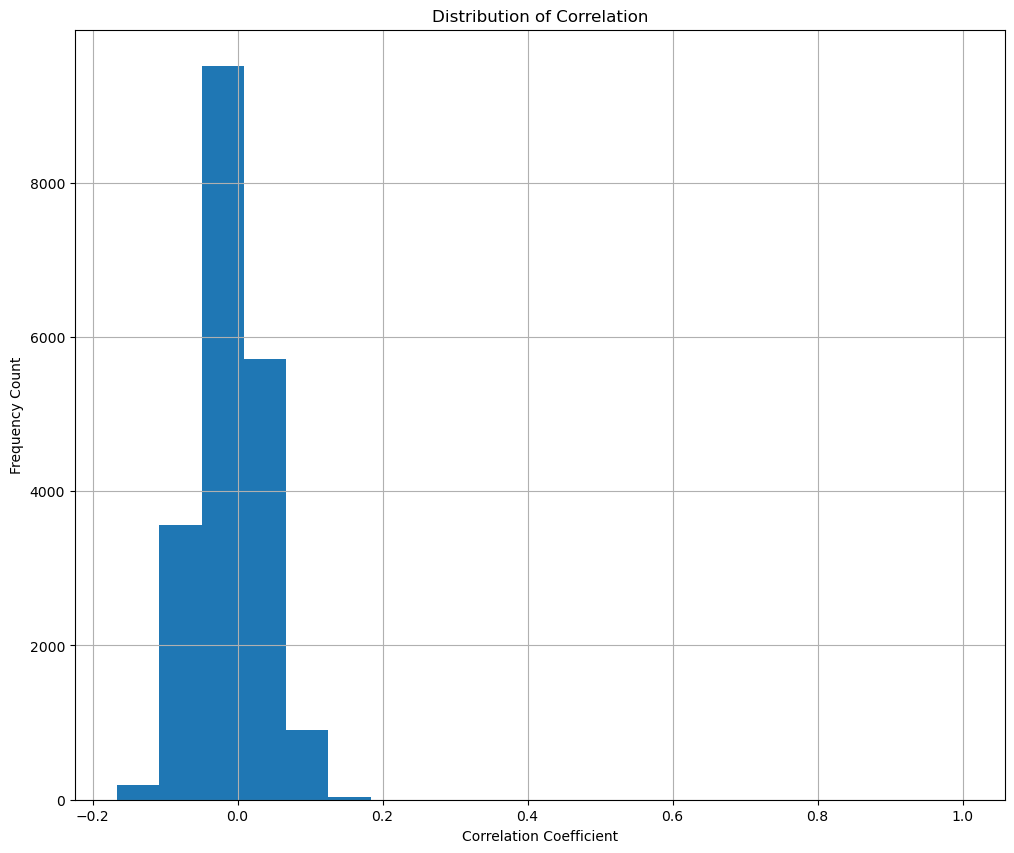

In [31]:
# Distribution of MRI_Track_Age_at_Scan
ADHD_FCM_sorted['Sex_F'].hist(figsize=(12, 10), bins=20)
# plt.suptitle("MRI_Track_Age_at_Scan Distributions")
plt.xlabel('Correlation Coefficient')
plt.title('Distribution of Correlation')
plt.ylabel('Frequency Count')
plt.show()

In [32]:
# random_rows_frac = ADHD_FCM.sample(frac=0.1)
# top = random_rows_frac.corr
# top

In [ ]:
pd.merge(train_FM, no_ADHD, on='participant_id', how='inner')

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
0,sId1cQF5F22m,0.205613,0.514554,0.580002,0.356749,0.355509,0.402521,0.503667,-0.090709,0.442115,...,-0.259806,-0.072032,0.395912,0.340496,0.217748,0.408298,0.174187,0.659205,0,0
1,bg3ft37FRcub,-0.103550,0.619001,0.311266,0.340943,0.357120,0.192131,0.225412,0.060566,0.167106,...,0.017501,0.053524,0.292457,0.229650,-0.066671,0.540195,0.457652,0.426239,0,1
2,ZrEocbbTa2lB,0.317702,0.779665,0.507222,0.295476,0.627698,0.625478,0.758024,0.431381,0.586897,...,0.065869,0.027101,0.243040,0.074694,0.039221,0.599289,0.536597,0.555973,0,0
3,4JjEThZDJkAl,0.430994,0.417583,0.513711,0.574826,0.171480,0.425331,0.132032,-0.070181,-0.151434,...,-0.249280,-0.168861,0.619324,0.479692,0.551265,0.566643,0.573914,0.536900,0,1
4,fWOgfZJtPJca,-0.059902,0.635214,0.053475,0.350553,0.677248,0.428800,0.645720,0.347821,0.588368,...,-0.511898,-0.317259,0.562038,0.520381,0.465522,0.442463,0.504747,0.496090,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,kTurROKp5YHQ,0.348020,0.749632,0.378984,0.622881,0.703211,0.720762,0.701220,0.437297,0.653208,...,0.111638,0.042620,0.490007,0.032003,0.408853,0.206432,0.668807,0.304231,0,1
378,vm2P1hmAY1hl,0.462948,0.851463,0.638908,0.542838,0.790042,0.599957,0.519429,0.197866,0.622234,...,-0.090862,0.034485,0.741929,0.630786,0.548605,0.653903,0.364794,0.519091,0,1
379,9gpepMI9sj5q,0.265284,0.551726,0.628318,0.647700,0.710757,0.132334,0.326207,0.354319,0.531170,...,0.298987,0.114577,0.534109,0.118893,0.181292,0.181055,0.238357,0.577009,0,1
380,syeyZjEx8FUx,0.189849,0.752876,0.842463,0.817037,0.820196,0.792950,0.650929,0.488504,0.580207,...,-0.221935,-0.202464,0.602651,0.482066,0.399363,0.373746,0.279900,0.684434,0,1
